# Imbalanced Dataset Manipulation

<img src='imbalance.jpeg' width=500>

## Why is imbalance dataset a problem?

Imbalanced dataset is commonly seen in cases like fraud detection. Since the target variable is highly imbalanced, **we cannot use simple metrics like accuracy score to determine goodness of the classification model**. A cancer predictor that predicts everyone not getting a cancer is not likely to be a good one since only a few people in the entire world will get a cancer. You might probably get an accuracy score of 90% or something.

In cases like fraud detection, most of the time there will only be 1% to 3% of fraud in the entire dataset. If you make a predictor that predict solely for "**No Crime**", you will get an accuracy score of 97%! That sounds wonderful, isn't it?

## How to deal with imbalanced data, then?

We can deal with imbalanced data in to ways. First, we need **better metrics to evaluate the result rather than accuracy score**. Moreover, since the minority portion of the data is scarce, we may need to sample our data (to decrease the majority portion), or synthesize more data (to increase the minority portion), in order to let our model perform better.

In this notebook we will implement some techniques come along with a pre-build package called **Imbalanced-Learn**. You can read the [documentation](https://imbalanced-learn.readthedocs.io/) for full code and explanation. I will also implement some visualization trick to visualize the entire process.

## Make Data

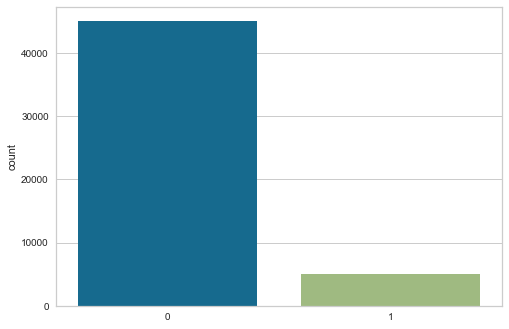

In [123]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score, classification_report

X, y = make_classification(
    n_classes=2, class_sep=1.5, weights=[0.9, 0.1],
    n_informative=4, n_redundant=1, flip_y=0,
    n_features=30, n_clusters_per_class=5,
    n_samples=50000, 
)

sns.countplot(y)

We can see that this dataset is imbalanced, with only 10% of the data labeling 1.

---
## Metrics for Imbalanced Dataset

**Why is imbalanced data an important issue?**

Imbalanced data is an important issue because it can mislead your machine learing algorithms if you don't recognize the context correctly. Let's say you want to solve a classification problem. The first metric that pops into your mind should be **accuracy_score**. However, here comes the nightmare!

In [124]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=910)

rfc = RandomForestClassifier().fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print(f"The accuracy score for this data classification problem is: {np.round(accuracy_score(y_test, y_pred),4)*100}%")

The accuracy score for this data classification problem is: 96.52%
CPU times: user 19.5 s, sys: 276 ms, total: 19.7 s
Wall time: 21.7 s


In [125]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     13468
           1       0.91      0.74      0.81      1532

    accuracy                           0.97     15000
   macro avg       0.94      0.86      0.90     15000
weighted avg       0.96      0.97      0.96     15000



It seams like **we have created a powerful model** that can predict the target variable perfectly! However, from the classification report we can see that this model has a low recall on the minority label, with the f1-score only 0.72. Let's compare our model with the baseline model.

In [126]:
%%time
y_pred = np.array([0] * len(y_test))
print(f"The accuracy score using the baseline model is: {np.round(accuracy_score(y_test, y_pred),4)*100}%")

The accuracy score using the baseline model is: 89.79%
CPU times: user 2.93 ms, sys: 1.12 ms, total: 4.04 ms
Wall time: 3.33 ms


In [127]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     13468
           1       0.00      0.00      0.00      1532

    accuracy                           0.90     15000
   macro avg       0.45      0.50      0.47     15000
weighted avg       0.81      0.90      0.85     15000



**The baseline model -- simply creating a list of zeros -- results in an accuracy of 90%!** The f1-score for minority label is 0, but it performs pretty well on the majority one. The problem lies in the fact that for imbalanced data, **accuracy is not the best metric**. It is also the metric that can mislead most of the people if they are not aware of the fact that their dataset is in essence imbalanced. 

**Metrics that can provide better insight include**: **`confusion matrix`**, **`precision`**, **`recall`**, and **`f1-score`**.

* **Confusion Matrix**: a table showing correct predictions and types of incorrect predictions.


* **Precision**: the number of true positives divided by all positive predictions. Precision is also called Positive Predictive Value. It is a measure of a classifier’s exactness. Low precision indicates a high number of false positives.
$$ Precision = \frac{TP}{TP+FP}$$


* **Recall**: the number of true positives divided by the number of positive values in the test data. Recall is also called Sensitivity or the True Positive Rate. It is a measure of a classifier’s completeness. Low recall indicates a high number of false negatives.

$$ Recall = \frac{TP}{TP+FN}$$

* **F1-Score**: the weighted average of precision and recall.
$$ F_1 = 2 \times \frac{precision \times recall}{precision + recall}$$

The following image perfectly illustrates the knowledge of a confusion matrix.

<img src='confusion.png' width=500>

For a given class, there are four different combinations for recall and precision:
* **High recall + High precision**: the model can perfectly detect and identify differnet classes

* **Low recall + High precision**: the model can’t detect the class well, but is highly trustable when it does

* **High recall + Low precision**: the model can detect the calss well, but it might also includes points of other classes. (poor segmentation)

* **Low recall + low precision**: the model cannot perfectly detect and identify differnet classes

In the following notebook, we will plot out the confusion matrix and view the classification report to see how the algorithm works.

---
## Methods for Imbalanced Data

So how can we hanle this issue properly? Before we answer this question we need to know **why imbalanced dataset often makes poor prediction**. One reason is that by fitting imbalanced data into machine learning models **the model might learn inappropriately**. In general, feeding imbalanced data to your classifier can make it **biased in favor of the majority class, simply because it did not have enough data to learn about the minority**.

Therefore, we have to ways to deal with this problem.

<img src='sampling.png' width=700>

1. **Under-sample datapoint with the majority label**: 

For example, in our current dataset we have 45,000 rows with label $0$ and 5,000 rows with label $1$. The under-sample method is to **sample 5,000 rows with the label $0$ from the 45,000 rows to make label $0$ and $1$ comparable**. The total number of rows in the dataset will therefore becomes 10,000. In this way, the machine learning model will not favor toward the majority label.

2. **Over-sample datapoint with the minority label**:

On the otherhand, we will oversample the minority label $0$ from 5,000 rows to 45,000 rows. In this case, the total number of rwos in the dataset will be 90,000. 


## Under-Sampling：TomekLinks

A Tomek's Link exists if two samples are the nearest neighbors of each others. In the figure below, a Tomek’s link is illustrated by highlighting the samples of interest in green.

<img src='tomek.png' width=400>

By setting the sampling_strategy = 'auto', the data belongs to the tomek link that also belongs to the majority class will be removed. Over several process the undersampling process can be done.

In [128]:
%%time
from imblearn.under_sampling import TomekLinks
algo = TomekLinks(n_jobs=-1)
X_TL, y_TL = algo.fit_sample(X_train, y_train)

CPU times: user 2min 6s, sys: 1.02 s, total: 2min 7s
Wall time: 42.2 s


In [129]:
%%time
rfc = RandomForestClassifier().fit(X_TL, y_TL)
y_pred = rfc.predict(X_test)

print(f"The accuracy score for this data classification problem is: {np.round(accuracy_score(y_test, y_pred),4)*100}%")

The accuracy score for this data classification problem is: 96.53%
CPU times: user 17.7 s, sys: 133 ms, total: 17.8 s
Wall time: 18.1 s


In [130]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     13468
           1       0.91      0.74      0.81      1532

    accuracy                           0.97     15000
   macro avg       0.94      0.86      0.90     15000
weighted avg       0.96      0.97      0.96     15000



In this case, using the TomekLink method there is little to none improvement compared to the original dataset. In most cases, undersampling will result in no improvement or event worse results. This is because **when you drop a significant number of rows (in this case 40,000 out of 50,000 rows), you will lose a great deal of information**. That is, it is highly likely that you will build a weak model unless you have a extremely huge dataset that even the minority one have many datapoint. Try undersampling with caution.

### Other Under-Sampling Techniques

Instead of the TomekLink algorithm, there are some other undersampling algorithms.

* **NearMiss**: An undersampling algorithm that adds heuristic rules to select samples. There are three types of heuristics that can be selected by the parameter "version". For more information check out [NearMiss UserGuide](https://imbalanced-learn.readthedocs.io/en/stable/under_sampling.html#mathematical-formulation).


* **EditedNearestNeighbours**: An undersampling algorithm that applies a nearest neighbors algorithm and then edits the dataset by removing samples which do not agree “enough” with their neighboorhood. This algorithm might only remove a small subset of data.


* **RepeatedEditedNearestNeighbours**: Repeat EditedNearestNeighbours numerous time.


---
## Over-Sampling：Synthetic Minority Over-Sampling Technique (SMOTE)

While there is a basic oversampling technique that simpling duplicates the datapoints from the minority portion, here I don't plan to take a look at those since they are not the most effective ones that are used today. In fact, duplicating data does no good to your model as you can easily guess since you model cannot learn new things from your data. It's still the same old data.

So what is SMOTE? As its name suggests, this technique generates synthetic data for the minortiy class.

### How does SMOTE work?

The SMOTE algorithm proceeds in folloing steps:

1. **Pick a datapoint as a centroid, a starting point for the process**


2. **Find its k nearest neighbors. (k_neighbors is one of the parameter in the SMOTE algorithm)**

SMOTE proceeds by joining the points of the minority class with the k neighbors specified with line segments and then places artificial points on these lines.

<img src='smote.png' width=400>

In this example, the 3 nearest example for the datapoint $x_i$ are included in the blue circle.

3. **Choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and its chosen neighbor**.

One of the nearest neighbors $x_{zi}$ will be selected and a new sample $x_{new}$ will be generated by the function below:

$$x_{new} = x_{i} + \lambda \times (x_{zi} - x{i})$$

$\lambda$ is a random number generated within the range of 0 and 1 by the random seed. This interpolation will create a sample on the line between $x_{i}$ and $x_{zi}$ as highlighted in green in the image above.

4. **Repeat the process above until the data is balanced**.




Let's see how to implement this SMOTE algorithm.

In [131]:
%%time
from imblearn.over_sampling import SMOTE
algo = SMOTE()
X_smote, y_smote = algo.fit_sample(X_train, y_train)

CPU times: user 476 ms, sys: 15.4 ms, total: 492 ms
Wall time: 514 ms


Let's see the result on our RandomForestClassifier.

In [132]:
%%time
rfc = RandomForestClassifier().fit(X_smote, y_smote)
y_pred = rfc.predict(X_test)

print(f"The accuracy score for this data classification problem is: {np.round(accuracy_score(y_test, y_pred),4)*100}%")

The accuracy score for this data classification problem is: 96.33%
CPU times: user 33.7 s, sys: 263 ms, total: 33.9 s
Wall time: 34.7 s


In [133]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     13468
           1       0.80      0.85      0.82      1532

    accuracy                           0.96     15000
   macro avg       0.89      0.91      0.90     15000
weighted avg       0.96      0.96      0.96     15000



While the accuracy score drops a little bit compared to the first try, from the classification report **we can see the inprovment in the f1-score form 0.72 to 0.78**, with randoming generating some more datapoints within the minority portion! The macro and weighted average precision, recall, and f1-scofe all increases with the help of this oversampling technique.

Note that there are randomness in the SMOTE algorithm as the datapoint on the line is generated randomly and the line is chosen randomly as well. Therefore, everytime you utilize this algorithm you will see different result. Set seed if you want to see constant ones.

### Variation for SMOTE algorithm

Instead of standard SMOTE algorithm, there are some variations that might suit other needs.

* **BorderlineSMOTE**: A variation of SMOTE that detects borderline samples and uses those **in danger** samples to generate new synthetic data. 


* **SVMSMOTE**: A variation of SMOTE that uses SVM classifier rather than K nearest neighbors to find support vectors and generate samples. 


* **KMeansSMOTE**: A variation of SMOTE that uses KMeans clustering method before applying SMOTE. The clustering will group samples together and generate new samples depending of the cluster density.


* **SMOTENC**: A variation of SMOTE that can also include categorical features.


* **Adaptive Synthetic (ADASYN)**: ADASYN works similarly to SMOTE, but **the number of samples generated for each $x_i$ is proportional to the number of samples which are not from the same class than x_i in a given neighborhood**. Therefore, more samples will be generated in the area that the nearest neighbor rule is not respected. 



For more information, check out the [imblearn userguide for more information](https://imbalanced-learn.readthedocs.io/en/stable/over_sampling.html#sample-generation).

---
## Ensemble：SMOTETomek

Now we have undersampling and oversamping techniques. What about combining the two?

After generating synthetic datapoints with the SMOTE algorithm, you might have lots of noisy data as you randomly generate data by interpolating new points between outliers and inliers. Therefore, combining a undersamping technique after an oversampling one can serve as a cleaning method that clears those noisy data points. Here we will use Tomek Link again.

In [134]:
%%time
from imblearn.combine import SMOTETomek
algo = SMOTETomek(n_jobs=-1)
X_st, y_st = algo.fit_sample(X_train, y_train)

CPU times: user 3min 3s, sys: 1.59 s, total: 3min 5s
Wall time: 1min 28s


In [135]:
%%time
rfc = RandomForestClassifier().fit(X_st, y_st)
y_pred = rfc.predict(X_test)

print(f"The accuracy score for this data classification problem is: {np.round(accuracy_score(y_test, y_pred),4)*100}%")

The accuracy score for this data classification problem is: 96.16%
CPU times: user 36.2 s, sys: 548 ms, total: 36.7 s
Wall time: 39.5 s


In [136]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     13468
           1       0.80      0.84      0.82      1532

    accuracy                           0.96     15000
   macro avg       0.89      0.91      0.90     15000
weighted avg       0.96      0.96      0.96     15000



The SMOTETomek algorithm clears noisy data that do not stay closed to its classes. Since the data in this notebook is simple, there's no visible improvement compare to the SMOTE algorithm. However, for larger and more complex dataset this method can improve the performance of imbalanced data pretty well.

### Other Ensemble Method

* **SMOTEENN**: A combination of SMOTE and EditedNearestNeighbours algorithms.


---
## End Note

In this notebook I just go through three popular sampling algorithms. In fract there are still many others. There is no single best technique. Generally you will need to experiment with a few of the techniques before deciding on one of them. Also be mindful of the randomness and the advantage and disadvantage of each of the methods.

**Referece:**

[How to Deal with Imbalanced Data using SMOTE](https://medium.com/analytics-vidhya/balance-your-data-using-smote-98e4d79fcddb)

[Dealing with Imbalanced Data](https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18)

[Precision and Recall](https://en.wikipedia.org/wiki/Precision_and_recall)